## Focus: TRI Facility Data

### What is TRI
TRI stands for **Toxic Release Inventory**. TRI provides data about enviromental releases of toxic chemcials from various facilities throughout the United States. It is important to state that the follow data puts focus on facilities, as this will show us where TRI facilities are in citys within Allegheny county. This will help us figure out a good area for living not within the distance of a facility, and to not be kn an area with many facilities. 

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
tridata = pd.read_csv('trifacilities.csv')

In [2]:
pittsburgh = tridata["CITY_NAME"] == "PITTSBURGH"
pitt = tridata[pittsburgh]

In [3]:
zipcodecount = pitt['ZIP_CODE'].value_counts()
zipcode_df = zipcodecount.to_frame()

Text(0.5, 1.0, 'TRI within Pittsburgh ZipCodes')

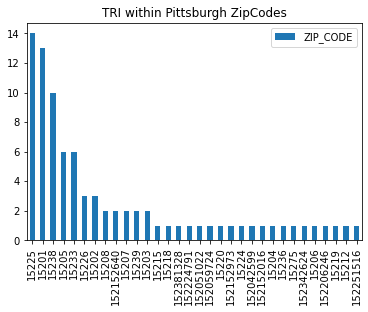

In [4]:
zipcode_df.plot.bar()
plt.title('TRI within Pittsburgh ZipCodes')

In [5]:
zipcodes = pitt.query("ZIP_CODE == 15215 or ZIP_CODE == 15218 or ZIP_CODE == 15220 or ZIP_CODE == 15224 or ZIP_CODE == 15204 or ZIP_CODE == 15236 or ZIP_CODE == 15275 or ZIP_CODE == 15206 or ZIP_CODE == 15219 or ZIP_CODE == 15212")
zipcodes_geo = gpd.GeoDataFrame(zipcodes, geometry = gpd.points_from_xy(zipcodes.PREF_LONGITUDE, zipcodes.PREF_LATITUDE))
zipcodes_geo['ZIP_CODE'].value_counts()

15212    1
15219    1
15206    1
15275    1
15236    1
15204    1
15215    1
15220    1
15218    1
15224    1
Name: ZIP_CODE, dtype: int64

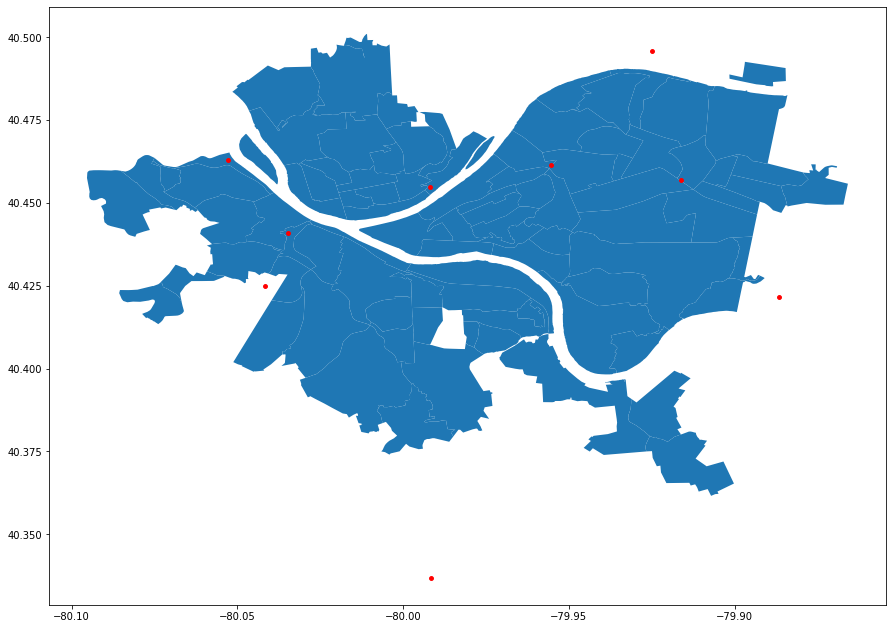

In [15]:
neighborhoods = gpd.read_file("Neighborhoods")

In [16]:
geometry = [Point(xy) for xy in zip(zipcodes['PREF_LONGITUDE'], zipcodes['PREF_LATITUDE'])]
gdf = GeoDataFrame(zipcodes, geometry = geometry)

neighborhoods = gpd.read_file("Neighborhoods")
gdf.plot(ax=neighborhoods.plot(figsize = (15,15)), marker='o', color='red', markersize=15)

The 5 neighborhoods are (with just one TRI Location), Esplen, West End, Troy Hill, Larimer, and Lower Laurenceville.